In [3]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("C:\\Users\\M.KAMRAN\\Desktop\\DATA SCIENCE PROJECTS\\European Soccer Database\\database.sqlite")  # Use exact filename

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in database:")
print(tables)


Tables in database:
                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [4]:
#Top Goal-Scoring Teams

In [5]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("C:\\Users\\M.KAMRAN\\Desktop\\DATA SCIENCE PROJECTS\\European Soccer Database\\database.sqlite") 
# Query: Total goals by home teams
query = """
SELECT 
    t.team_long_name AS Team,
    COUNT(*) AS Total_Matches,
    SUM(m.home_team_goal) AS Home_Goals,
    ROUND(AVG(m.home_team_goal), 2) AS Avg_Goals_Per_Match
FROM Match m
JOIN Team t ON m.home_team_api_id = t.team_api_id
GROUP BY t.team_long_name
ORDER BY Home_Goals DESC
LIMIT 10;
"""

# Run the query and load into DataFrame
top_goal_teams = pd.read_sql_query(query, conn)

# Display the result
print(top_goal_teams)


                Team  Total_Matches  Home_Goals  Avg_Goals_Per_Match
0     Real Madrid CF            152         505                 3.32
1       FC Barcelona            152         495                 3.26
2             Celtic            152         389                 2.56
3   FC Bayern Munich            136         382                 2.81
4                PSV            136         370                 2.72
5    Manchester City            152         365                 2.40
6               Ajax            136         360                 2.65
7           FC Basel            143         344                 2.41
8  Manchester United            152         338                 2.22
9            Chelsea            152         333                 2.19


In [6]:
#Player Attributes Over Time

In [7]:
query = """
SELECT 
    pa.date, 
    p.player_name, 
    pa.overall_rating, 
    pa.potential
FROM Player_Attributes pa
JOIN Player p ON pa.player_api_id = p.player_api_id
ORDER BY pa.date DESC
LIMIT 10;
"""

players_df = pd.read_sql_query(query, conn)
print(players_df)


                  date          player_name  overall_rating  potential
0  2016-07-07 00:00:00  Adalberto Penaranda              72         84
1  2016-07-07 00:00:00        Baptiste Aloe              66         76
2  2016-07-07 00:00:00                 Bebe              72         75
3  2016-07-07 00:00:00      Florian Lejeune              73         77
4  2016-07-07 00:00:00         Jhon Murillo              67         79
5  2016-07-07 00:00:00       Kevin Koubemba              64         68
6  2016-07-07 00:00:00      Ronnie Schwartz              68         70
7  2016-07-07 00:00:00              Wallace              74         82
8  2016-07-07 00:00:00   Yanis Mbombo Lokwa              63         72
9  2016-06-30 00:00:00   Anderson Conceicao              68         70


In [8]:
#visualize SINGLE player performance over time

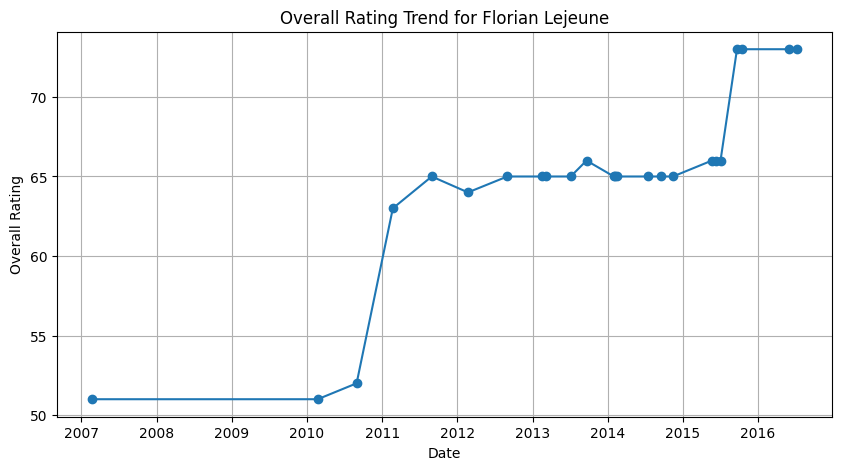

In [9]:
import matplotlib.pyplot as plt

# Player name to analyze
player_name = "Florian Lejeune"

# Query to get rating over time for this player
query = f"""
SELECT 
    date, 
    overall_rating 
FROM Player_Attributes pa
JOIN Player p ON pa.player_api_id = p.player_api_id
WHERE p.player_name = '{player_name}'
ORDER BY date;
"""

player_rating = pd.read_sql_query(query, conn)

# Convert date to datetime type
player_rating['date'] = pd.to_datetime(player_rating['date'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(player_rating['date'], player_rating['overall_rating'], marker='o')
plt.title(f"Overall Rating Trend for {player_name}")
plt.xlabel("Date")
plt.ylabel("Overall Rating")
plt.grid(True)
plt.show()


In [10]:
#visualize MULTI player performance over time

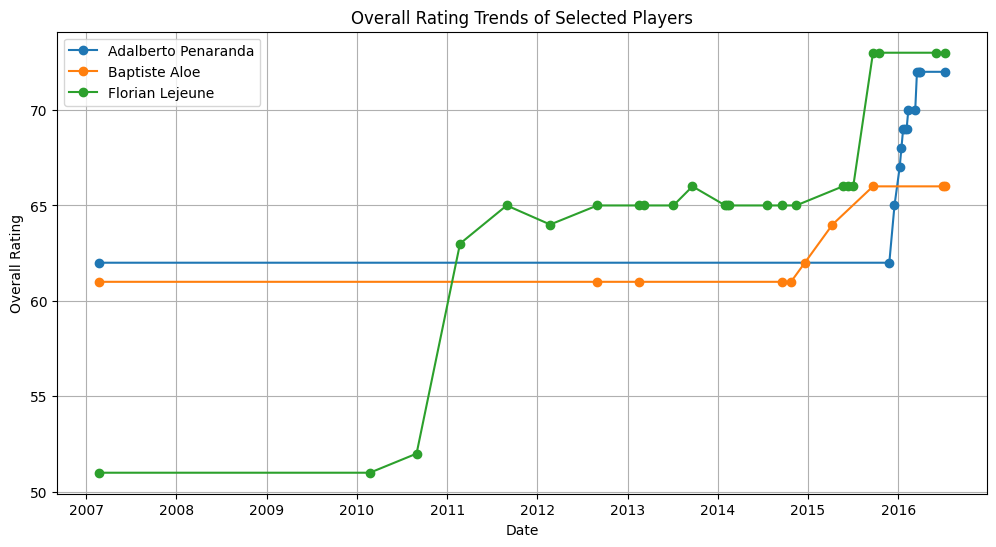

In [11]:
import matplotlib.pyplot as plt

# List of players to compare
players = ["Adalberto Penaranda", "Baptiste Aloe", "Florian Lejeune"]

plt.figure(figsize=(12, 6))

for player_name in players:
    query = f"""
    SELECT 
        date, 
        overall_rating 
    FROM Player_Attributes pa
    JOIN Player p ON pa.player_api_id = p.player_api_id
    WHERE p.player_name = '{player_name}'
    ORDER BY date;
    """
    player_data = pd.read_sql_query(query, conn)
    player_data['date'] = pd.to_datetime(player_data['date'])
    
    plt.plot(player_data['date'], player_data['overall_rating'], marker='o', label=player_name)

plt.title("Overall Rating Trends of Selected Players")
plt.xlabel("Date")
plt.ylabel("Overall Rating")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#visualize MULTI player performance over time

  player_name  record_count
0      Danilo           108
1        Alex           104
2     Douglas            93
3      Felipe            89
4     Ricardo            84


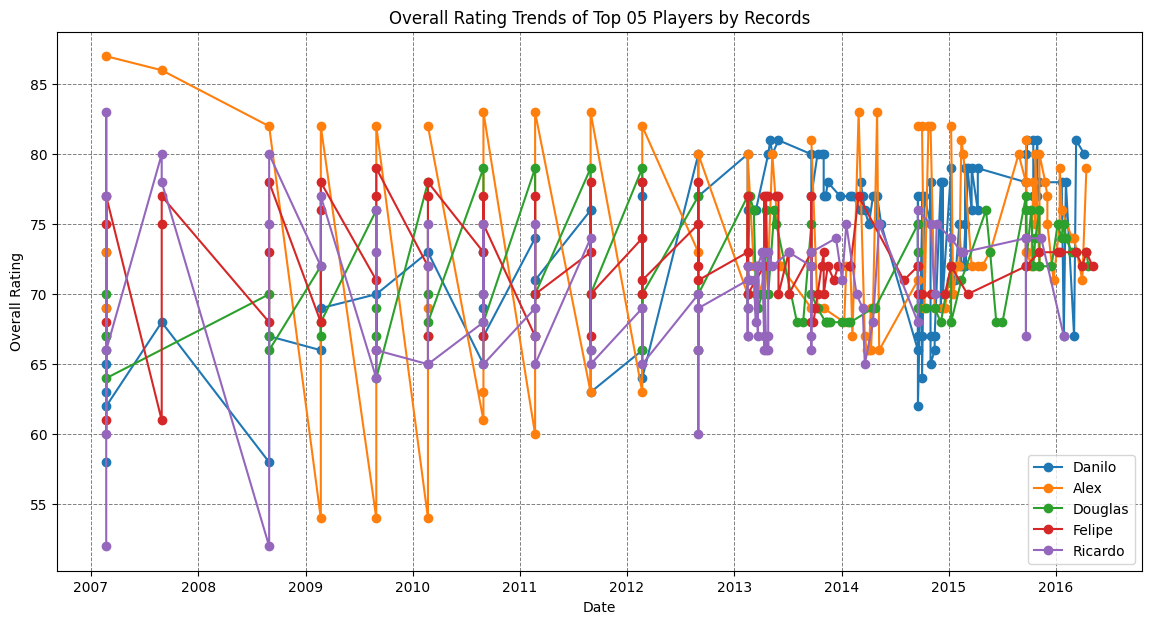

In [13]:
# Find top 10 players with most attribute records
top_players_query = """
SELECT 
    p.player_name, 
    COUNT(*) AS record_count
FROM Player_Attributes pa
JOIN Player p ON pa.player_api_id = p.player_api_id
GROUP BY p.player_name
ORDER BY record_count DESC
LIMIT 05;
"""

top_players = pd.read_sql_query(top_players_query, conn)
print(top_players)

# Plotting
plt.figure(figsize=(14, 7))

for player_name in top_players['player_name']:
    query = f"""
    SELECT 
        date, 
        overall_rating 
    FROM Player_Attributes pa
    JOIN Player p ON pa.player_api_id = p.player_api_id
    WHERE p.player_name = '{player_name}'
    ORDER BY date;
    """
    player_data = pd.read_sql_query(query, conn)
    player_data['date'] = pd.to_datetime(player_data['date'])
    
    plt.plot(player_data['date'], player_data['overall_rating'], marker='o', label=player_name)

plt.title("Overall Rating Trends of Top 05 Players by Records")
plt.xlabel("Date")
plt.ylabel("Overall Rating")
plt.legend()
plt.grid(True,color='gray', linestyle='--', linewidth=0.7)
plt.show()


In [14]:
#Exported all player attributes

In [15]:
query = """
SELECT 
    pa.date,
    p.player_name,
    pa.overall_rating,
    pa.potential,
    pa.crossing,
    pa.finishing,
    pa.heading_accuracy,
    pa.short_passing,
    pa.volleys,
    pa.dribbling,
    pa.curve,
    pa.free_kick_accuracy,
    pa.long_passing,
    pa.ball_control,
    pa.acceleration,
    pa.sprint_speed,
    pa.agility,
    pa.reactions,
    pa.balance,
    pa.shot_power,
    pa.jumping,
    pa.stamina,
    pa.strength,
    pa.long_shots,
    pa.aggression,
    pa.interceptions,
    pa.positioning,
    pa.vision,
    pa.penalties,
    pa.marking,
    pa.standing_tackle,
    pa.sliding_tackle,
    pa.gk_diving,
    pa.gk_handling,
    pa.gk_kicking,
    pa.gk_positioning,
    pa.gk_reflexes
FROM Player_Attributes pa
JOIN Player p ON pa.player_api_id = p.player_api_id;
"""

all_player_data = pd.read_sql_query(query, conn)
all_player_data.to_csv("all_player_attributes.csv", index=False)
print("Exported all player attributes to all_player_attributes.csv")


Exported all player attributes to all_player_attributes.csv


In [16]:
#Average Player Overall Rating Over Time

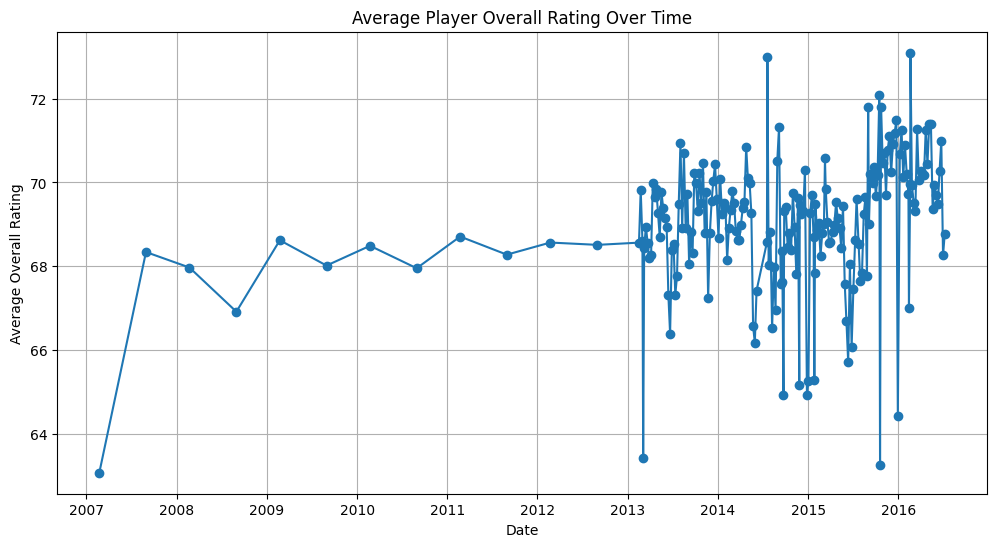

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV if you haven't already
df = pd.read_csv('all_player_attributes.csv', parse_dates=['date'])

# Group by date and calculate the average overall_rating
time_series = df.groupby('date')['overall_rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(time_series['date'], time_series['overall_rating'], marker='o', linestyle='-')
plt.title('Average Player Overall Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()


In [18]:
#Distribution of player skills (e.g., dribbling, finishing)

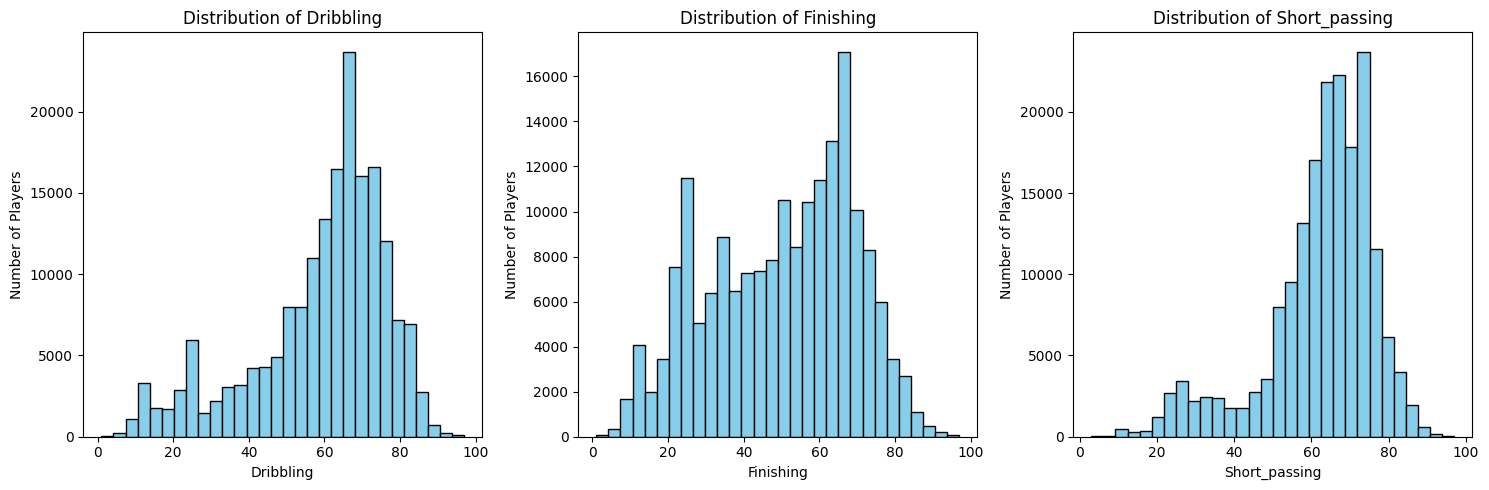

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('all_player_attributes.csv')

# List of skills to analyze
skills = ['dribbling', 'finishing', 'short_passing']

plt.figure(figsize=(15, 5))

for i, skill in enumerate(skills, 1):
    plt.subplot(1, len(skills), i)
    plt.hist(df[skill].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {skill.capitalize()}')
    plt.xlabel(skill.capitalize())
    plt.ylabel('Number of Players')

plt.tight_layout()
plt.show()


In [20]:
# Correlation heatmap of player skills

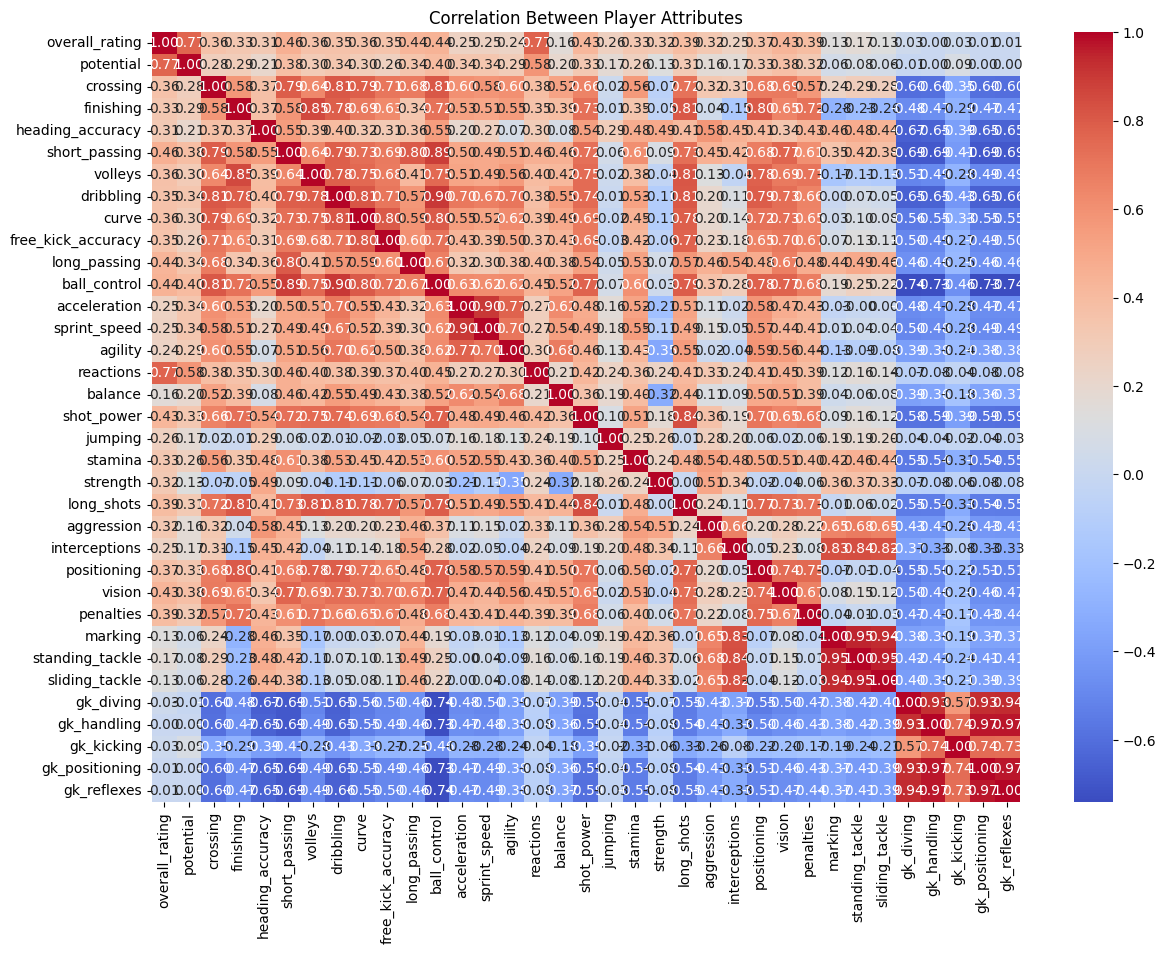

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only skill columns (drop non-numeric like 'player_name', 'date')
skill_df = df.drop(['player_name', 'date'], axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(skill_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Between Player Attributes')
plt.show()


In [25]:
top_dribblers = df[['player_name', 'dribbling']].sort_values(by='dribbling', ascending=False).head(10)
print(top_dribblers)


         player_name  dribbling
102501  Lionel Messi       97.0
102504  Lionel Messi       97.0
102494  Lionel Messi       97.0
102493  Lionel Messi       97.0
102495  Lionel Messi       97.0
102505  Lionel Messi       97.0
102491  Lionel Messi       97.0
102497  Lionel Messi       97.0
102498  Lionel Messi       97.0
102492  Lionel Messi       97.0


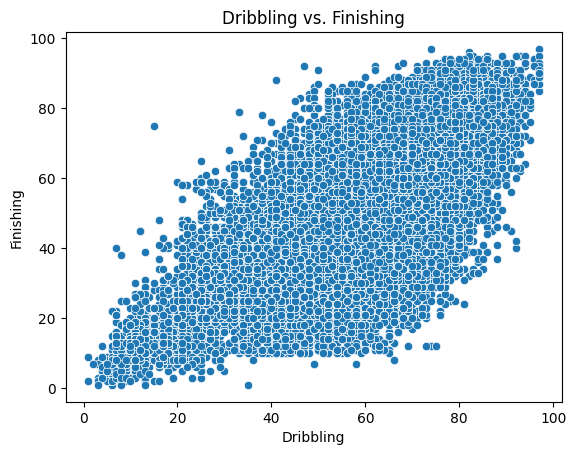

In [26]:
sns.scatterplot(data=df, x='dribbling', y='finishing')
plt.title('Dribbling vs. Finishing')
plt.xlabel('Dribbling')
plt.ylabel('Finishing')
plt.show()


In [29]:
plt.savefig('skill_distribution.png')



<Figure size 640x480 with 0 Axes>